In [22]:
!pip install japanize_matplotlib -q
!pip install ipywidgets -q

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error
import japanize_matplotlib
from ipywidgets import interact
warnings.simplefilter("ignore")

# データを準備

matplotlibで可視化をしてみよう．

`matplotlib.pyplot.scatter(X, y, **args)`

で散布図を描画できる．

Text(0, 0.5, 'earnings')

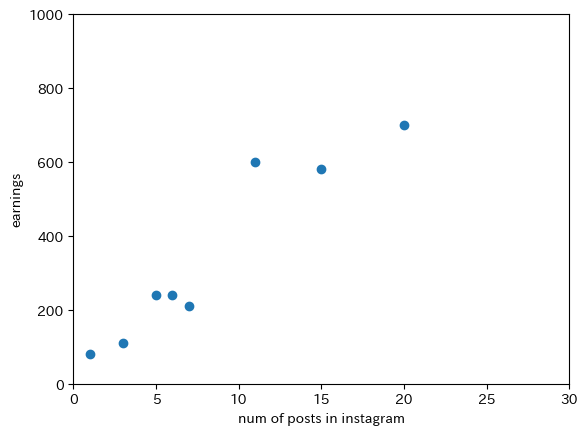

In [24]:
#X:インスタグラムの投稿数 y:年間のケーキの売り上げ(万円)
X = np.array([5, 3, 6, 11, 7, 15, 20, 1])
y = np.array([240,  110, 240, 600, 210, 580, 700, 80])

# 散布図を描画
plt.scatter(X, y)

# x軸の上限と下限を設定
plt.xlim(0,30)

# y軸の上限と下限を設定
plt.ylim(0, 1000)

# ラベルを設定
plt.xlabel("num of posts in instagram")
plt.ylabel("earnings")

## DataFrameを定義しよう．

pandas.DataFrame型にデータを格納．

`df = pd.DataFrame(data)`で格納する．

In [25]:
df_cake = pd.DataFrame(data={"インスタグラムの投稿数": X, "ケーキの売り上げ": y})
df_cake

,インスタグラムの投稿数,ケーキの売り上げ
0,5,240
1,3,110
2,6,240
3,11,600
4,7,210
5,15,580
6,20,700
7,1,80


## sklearnのLinearRegressionクラスから学習させる

基本的なやり方はこれからも同じなので，覚えておこう．

1. 作成したいモデルのインスタンスを生成．
2. モデルインスタンスの`fit()`メソッドを用いて学習
3. 精度を見る（場合によっては可視化）

 

In [26]:
#作成したいモデルのインスタンス生成
slr = LinearRegression()

#学習
print("reshape前")
print(X.shape)
print("reshape後")
print(X.reshape(-1, 1))
slr.fit(X.reshape(-1,1), y)

reshape前
(8,)
reshape後
[[ 5]
 [ 3]
 [ 6]
 [11]
 [ 7]
 [15]
 [20]
 [ 1]]


LinearRegression()

In [27]:
print(slr.coef_)
print(slr.intercept_)

[35.97222222]
39.23611111111114


In [28]:
#可視化のために，xの値を用意（dと書いている）
d = np.arange(0, 30) #np.arrange(a, b) => a~b-1以下の数を１ずつ生成, aが小数：その値から1ずつ生成、bが小数：その値を超えない最大の整数までの値を生成
print(d)
z = slr.coef_*d+slr.intercept_
print(z)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[  39.23611111   75.20833333  111.18055556  147.15277778  183.125
  219.09722222  255.06944444  291.04166667  327.01388889  362.98611111
  398.95833333  434.93055556  470.90277778  506.875       542.84722222
  578.81944444  614.79166667  650.76388889  686.73611111  722.70833333
  758.68055556  794.65277778  830.625       866.59722222  902.56944444
  938.54166667  974.51388889 1010.48611111 1046.45833333 1082.43055556]


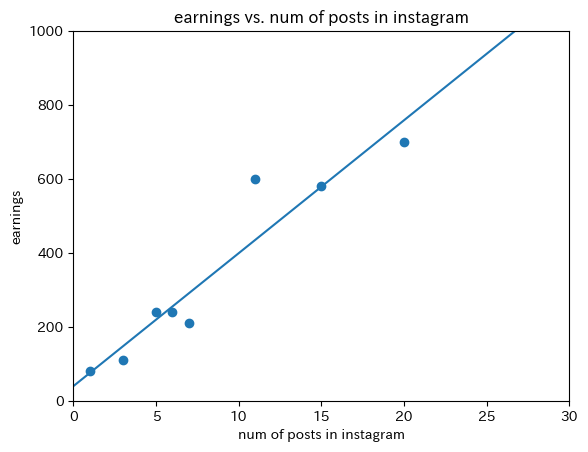

In [29]:
#可視化
plt.scatter(X, y)
plt.plot(d, z)
plt.xlim(0, 30)
plt.ylim(0, 1000)
plt.title("earnings vs. num of posts in instagram")
plt.xlabel("num of posts in instagram")
plt.ylabel("earnings")
plt.show()

In [30]:
#予測値から精度を求める（真の値とのずれ具合を見る．）
y_pred = slr.coef_.T * X +slr.intercept_

#r2_score
#print(R2_score(X, y, slr))
print(slr.score(X.reshape(-1,1), y))

#use sklearn function
print(r2_score(y, y_pred))

0.9045442286947141
0.9045442286947141


In [31]:
print(slr.predict(np.array([[25]])))
print(slr.predict(np.array([[13]])))

[938.54166667]
[506.875]


In [32]:
# def R2_score(X , y, model):
#     y_pred = model.coef_*X + model.intercept_
#     y_ave = np.average(y)
#     err_hat = y - y_pred
#     err_ave = y - y_ave
#     r2 = 1 - ((err_hat.T @ err_hat )/ (err_ave.T @ err_ave))
#     return r2

In [33]:
#california hosing 基本情報
california = fetch_california_housing()
# print(california.data)
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [34]:
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df["MEDV"] = california.target
#california_df[california_df["TAX"]>=600][california_df["TAX"]<700].count()
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [35]:
#californiaのデータセットを使って単回帰を実装
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df["MEDV"] = california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


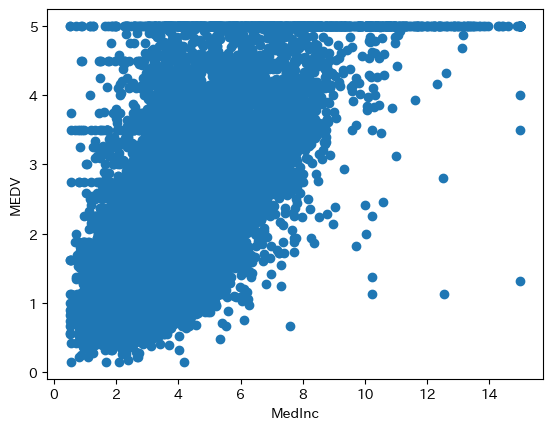

In [36]:
X = np.array(california_df["MedInc"]).reshape(-1, 1)
y = np.array(california_df["MEDV"]).reshape(-1, 1)
plt.scatter(X, y)
plt.xlabel("MedInc")
plt.ylabel("MEDV")
plt.show()

In [37]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.score(X, y))
lr.predict(np.array([[5]]))

0.47344749180719903


array([[2.54054823]])

## データ分割

訓練用データと検証用データに分割する．

`train_test_split(x, y, test_size)`で分割できる

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X.reshape(-1,1), y, train_size = 0.7, test_size = 0.3, random_state = 0)

In [39]:
from sklearn.metrics import mean_squared_error
model = LinearRegression()

model.fit(X_train, Y_train)

print(f'train_r2score = {model.score(X_train, Y_train)}')
print(f'test_r2score = {model.score(X_test, Y_test)}')
print(f'train_rmse_score = {mean_squared_error(Y_train, model.predict(X_train))}')
print(f'test_rmse_score = {mean_squared_error(Y_test, model.predict(X_test))}')
print(f'回帰係数={model.coef_}')
print(f'定数項={model.intercept_}')

train_r2score = 0.4805817090322434
test_r2score = 0.4564978967949699
train_rmse_score = 0.6912359286141403
test_rmse_score = 0.7246170029654281
回帰係数=[[0.42289855]]
定数項=[0.43306076]


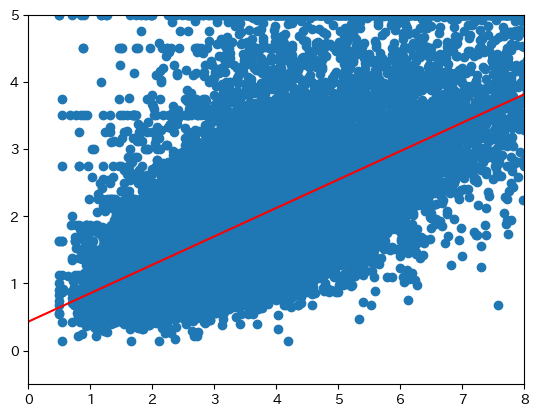

In [40]:
plt.scatter(X,y)
nums = np.arange(-2,20)
nums_y = nums*model.coef_+model.intercept_
nums_y = nums_y.reshape(-1,1)
plt.plot(nums, nums_y, color= "red" )
plt.xlim(0,8)
plt.ylim(-0.5,5)
plt.show()